# Imports
Import libraries and write settings here.

In [98]:
# Notebooks specific imports ########################################
from IPython import get_ipython
ipython = get_ipython()
#Expand notebook display
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload
%autoreload 2
from tqdm.notebook import tqdm
# End notebooks specific imports ####################################

# Basic useful imports
import yaml
from pathlib import Path
import h5py

# Data manipulation
import numpy as np

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt

# From alens_analysis
import alens_analysis as aa
import alens_analysis.chromatin as aac

# Locations
alens_data_path = Path.home() / 'projects/DATA/my_alens_data_new/'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Let's read in the data and take a first look at the motion of the moving sylinder over time.

1002


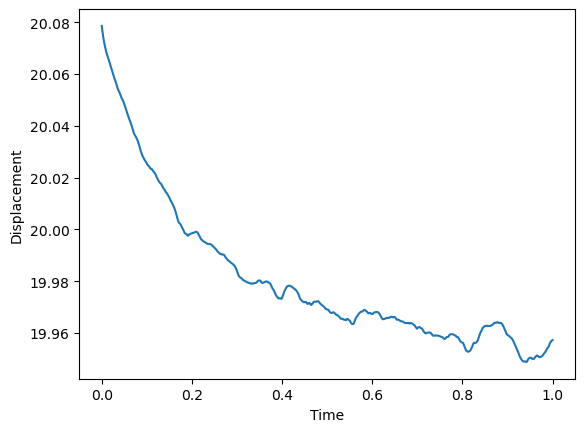

In [11]:
# Set the root of your simulation data. Pathlib makes extending the data paths easy.
sim_path = alens_data_path / 'MixMotorSliding'

# Load in collected data from simulation
with h5py.File(next(sim_path.glob('analysis/raw_MixMotorSliding.h5')), 'r+') as h5_data:
    # Load in time of every data point
    time_arr = h5_data['time'][:]
    print(time_arr.size) # How many time points are there?
    # Load in sylinder data and get center of mass (COM) locations
    sy_dat = h5_data['raw_data']['sylinders'][...]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])

# Plot total displacement of COM of rod 1 vs time
_ = plt.plot(time_arr, np.linalg.norm(sy_dat[1,:,:],axis=0))
_ = plt.xlabel("Time [s]")
_ = plt.ylabel("Displacement [$\mu$m]")

## Accessing parameters from the raw HDF5 file

If we want to inspect the parameters of the simulations, we can do that by reading in the yaml file stored in HDF5 file attrs

In [30]:
with h5py.File(next(sim_path.glob('analysis/raw_MixMotorSliding.h5')), 'r+') as h5_data:
    # Print what data is stored in the attribute dictionary of h5_data
    print(h5_data.attrs.keys(), "\n")
    # Examine the RunConfig file
    print( "###### RunConfig file string ########")
    run_config_str = h5_data.attrs['RunConfig']
    print(run_config_str, "\n")



<KeysViewHDF5 ['ProteinConfig', 'RunConfig']> 

###### RunConfig file string ########
KBT: -0.00411
conMaxIte: 10000
conResTol: 1e-5
conSolverChoice: 0
dt: 1.0e-05
logLevel: 3
monolayer: false
rngSeed: 1234
simBoxHigh:
- 20.0
- 1.0
- 1.0
simBoxLow:
- 0.0
- 0.0
- 0.0
simBoxPBC:
- false
- false
- false
sylinderColBuf: 1.0
sylinderDiameter: 0.025
sylinderDiameterColRatio: 1.0
sylinderFixed: false
sylinderLength: 0.5
sylinderLengthColRatio: 1.0
sylinderLengthSigma: 0
sylinderNumber: 4000
timeSnap: 0.001
timeTotal: 1.0
timerLevel: 3
viscosity: 1.0
 



To make this more usable we can convert the yaml file string to a python dictionary. This is useful for example if we want to use the parameters in a plot or in analysis e.g. rescaling by temperature, viscosity, etc.

In [34]:
print( "###### RunConfig dictionary ########")
# Load in the yaml dictionary
param_dict = yaml.load(run_config_str, Loader=yaml.FullLoader)  
print(param_dict, "\n")
print(" The viscosity of the fluid is", param_dict['viscosity'], "pN s/um^2")

###### RunConfig dictionary ########
{'KBT': -0.00411, 'conMaxIte': 10000, 'conResTol': '1e-5', 'conSolverChoice': 0, 'dt': 1e-05, 'logLevel': 3, 'monolayer': False, 'rngSeed': 1234, 'simBoxHigh': [20.0, 1.0, 1.0], 'simBoxLow': [0.0, 0.0, 0.0], 'simBoxPBC': [False, False, False], 'sylinderColBuf': 1.0, 'sylinderDiameter': 0.025, 'sylinderDiameterColRatio': 1.0, 'sylinderFixed': False, 'sylinderLength': 0.5, 'sylinderLengthColRatio': 1.0, 'sylinderLengthSigma': 0, 'sylinderNumber': 4000, 'timeSnap': 0.001, 'timeTotal': 1.0, 'timerLevel': 3, 'viscosity': 1.0} 

 The viscosity of the fluid is 1.0 pN s/um^2


We can also collect data without command line interface by using the `convert_dat_to_hdf` function provided in alens_analysis. Let's try this on our newly created data.

In [35]:
opts = lambda: None # Create an empty object to store analysis options
opts.path = alens_data_path / 'MixMotorSliding'
opts.analysis = 'collect' # This replicates the -A flag when running `analens -A collect`
opts.analysis_dir = opts.path / 'analysis' # Specify where to store the analysis files
opts.analysis_dir.mkdir(exist_ok=True) # Make sure the analysis directory exists

aa.seed_analysis(opts)


raw_MixMotorSliding
Made time data set in 0.5724332332611084 seconds.
Made sylinder data set in 0.30068397521972656 seconds.
Made protin data set in 1.4011647701263428 seconds.
Made raw data file in a total of 2.2746071815490723 seconds.
 HDF5 raw created in 2.3863158226013184


## Post-processing of data

Sometimes analyzing your data can take a long time and you would like to save that analysis for easy graphing later. So let's look at the more complicated system the we ran at the beginning of this tutorial in `Active3DNematic`. First we generate the raw data file previously,  

In [88]:
opts = lambda: None 
opts.path = alens_data_path / 'Active3DNematic' # Notice the different path
opts.analysis = 'collect'
opts.analysis_dir = opts.path / 'analysis'
opts.analysis_dir.mkdir(exist_ok=True)

aa.seed_analysis(opts)


raw_Active3DNematic
Made time data set in 1.1759650707244873 seconds.
Made sylinder data set in 8.56201696395874 seconds.
Made protin data set in 16.39557909965515 seconds.
Made raw data file in a total of 26.13410210609436 seconds.
 HDF5 raw created in 26.26052212715149


We need to correct data for the periodic boundary conditions. We can do this by using the `calc_nematic_order` function provided in alens_analysis. This function takes in the raw data and the parameters of the simulation and returns the corrected data. 

In [112]:
import alens_analysis.chromatin.make_motion_graph as mmg

with h5py.File(next(opts.analysis_dir.glob('raw*.h5')), 'r') as h5_data:
    param_dict = yaml.load(h5_data.attrs['RunConfig'], Loader=yaml.FullLoader)  
    box_lower = np.array(param_dict['simBoxLow'])
    box_upper = np.array(param_dict['simBoxHigh'])
    time_arr = h5_data['time'][:]
    # Load in sylinder data and apply periodic boundary conditions
    sy_dat = h5_data['raw_data/sylinders'][...]
    sy_dat = aa.helpers.apply_pbc_to_raw_syl_data(sy_dat, box_lower, box_upper)
    print(sy_dat.shape)

    

(500, 9, 1002)


[0.9993333333333334, 0.9993333333333334, 0.9968922615485734, 0.9960099550706061, 0.9947465981682848, 0.9934190233530338, 0.9916865041489287, 0.9896480935910231, 0.9882193472901688, 0.9861009709722811, 0.9839358192705148, 0.9823069096338607, 0.980597235365138, 0.9786726719033096, 0.9761045489723316, 0.9735239174776853, 0.9711136583565131, 0.9689054842528529, 0.9668978561097599, 0.9653027572236326, 0.9630627702381177, 0.961436900676387, 0.9595527947507823, 0.957473384653953, 0.955395915639799, 0.9529472345554718, 0.9508529517994628, 0.9474372318772583, 0.9452232926948207, 0.9433981753659633, 0.9417804344494781, 0.9402302050716573, 0.9384723426869436, 0.9368438272538824, 0.9365797397285412, 0.9352485696280689, 0.9336448551638048, 0.9314810200343281, 0.9294877381514525, 0.9280373226553847, 0.9265440455845056, 0.9255063976900986, 0.924253946709195, 0.9225247507719272, 0.9213414381186895, 0.9197350029998645, 0.9183472810631406, 0.9165198663454379, 0.9153980163347338, 0.9137296577655523, 0.91

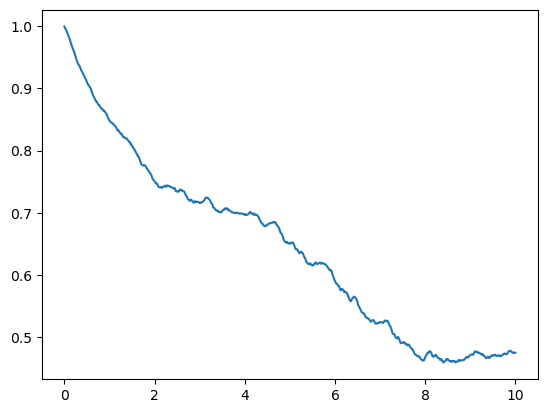

In [111]:
nematic_order = aa.nematic_order.calc_nematic_order(sy_dat)
plt.plot(time_arr, nematic_order)
plt.xlabel("Time [s]")
plt.ylabel("Nematic order parameter")